In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import random

pi = np.pi

BPSK Modulation

In [32]:
m_len = 8
m = [random.choice([1,0]) for i in np.arange(0,m_len)]

f = 100
bpsk = []
for i in m:
    if i == 1:
        for j in range(f):
            bpsk.append(1)
    else:
        for j in range(f):
            bpsk.append(-1)

t = np.arange(0,m_len,(1 / f))
carr_wav = np.cos(2 * np.pi * 2 * t)

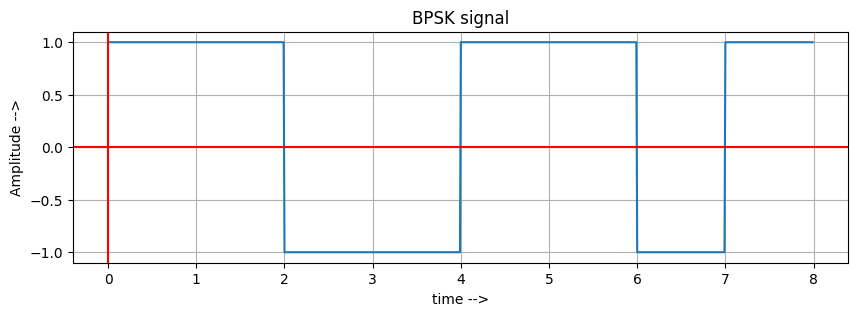

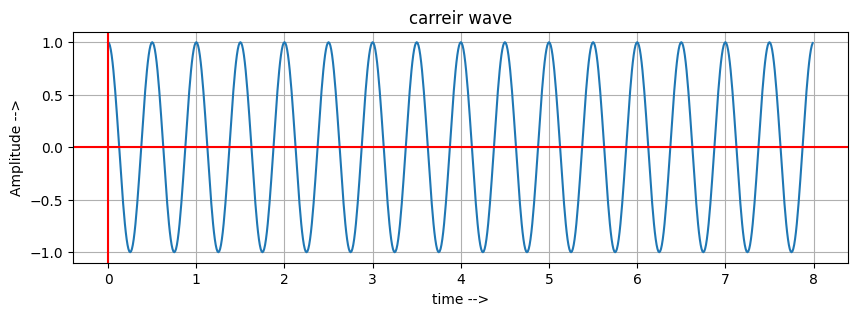

In [33]:
#PLotting of BPSK signal
plt.figure(figsize = (10,3))
plt.plot(t,bpsk)
plt.title('BPSK signal')
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid(True)

#Plotting of carrier  signal
plt.figure(figsize = (10,3))
plt.plot(t,carr_wav)
plt.title('carreir wave')
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid(True)

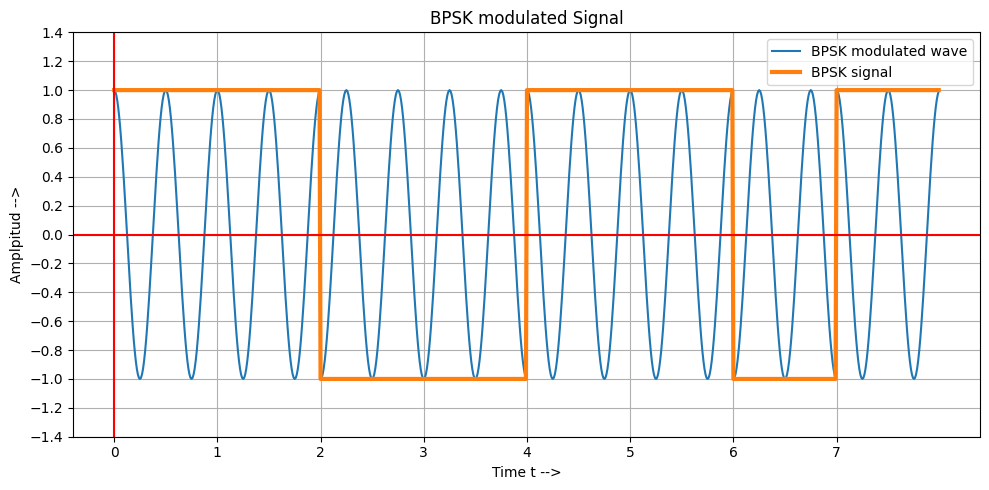

In [34]:
# plotting of bpsk modulated signal
bpsk_wav = np.array(bpsk) * carr_wav
plt.figure(figsize=(10,5))
plt.plot(t,bpsk_wav, label = 'BPSK modulated wave')
plt.plot(t,bpsk, linewidth = 3, label = 'BPSK signal')
plt.legend()
plt.xticks(np.arange(0,m_len))
plt.yticks(np.arange(-1.4, 1.6, 0.2))
plt.grid(True)
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.title("BPSK modulated Signal")
plt.xlabel("Time t -->")
plt.ylabel("Amplpitud -->")
plt.tight_layout()

BPSK DEMODULATION

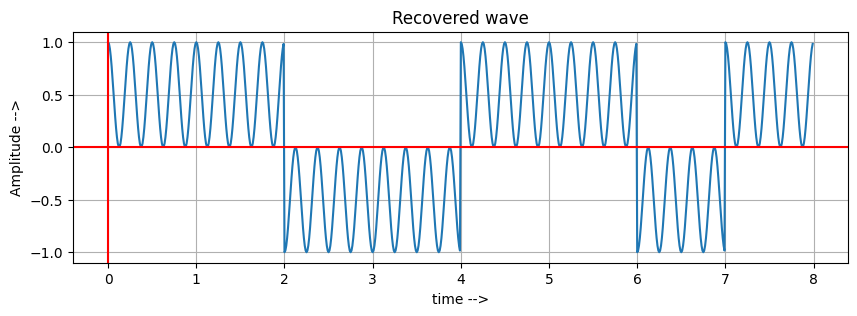

In [35]:
#received signal
recovered = bpsk_wav * carr_wav 
plt.figure(figsize = (10,3))
plt.plot(t,recovered)
plt.title('Recovered wave')
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid(True)

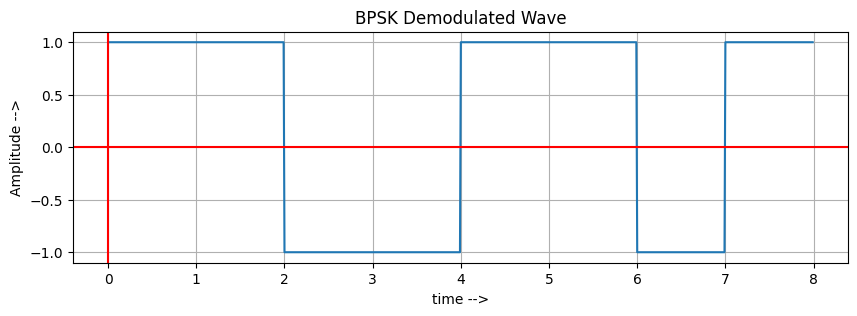

In [36]:

#demosulated signal 
demod = []
for i in ((recovered)):
    if i > 0:
        demod.append(1)
    elif i < 0:
        demod.append(-1)
    else:
        if(i >recovered[i-1]):
            demod.append(1)
        else:
            demod.append(-1)
plt.figure(figsize = (10,3))
plt.plot(t,demod)
plt.title('BPSK Demodulated Wave')
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid(True)

BER vs SNR


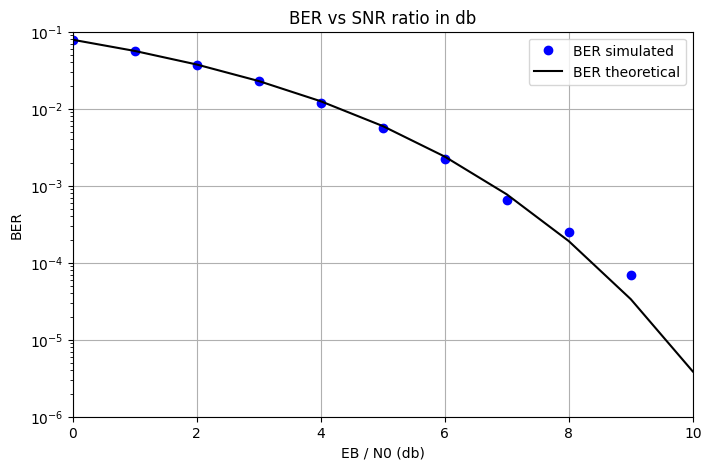

In [38]:
EbN0db = np.arange(0,11)
Nsym = 10 ** 5
BER_sim = np.zeros(len(EbN0db))

# sym = [random.choice([1,0]) for i in range(Nsym)]
sym = []
bits = [0,1]
for i in range(Nsym):
    sym.append(random.choice(bits))

NRZ = np.zeros(len(sym))
for j in range(len(sym)):
    if sym[j] == 1:
        NRZ[j] =+1
    elif sym[j] == 0:
        NRZ[j]  =-1
 # NRZop = [1 if sym[i] == 1 else -1 for i in range(Nsym)]
# NRZ = np.array(NRZop)

for i, EbN0db1 in enumerate(EbN0db):
    gamma = 10 ** (EbN0db1 / 10)
    P = sum(abs(NRZ) ** 2) / len(NRZ)
    N0 = P / gamma
    n = np.sqrt(N0 / 2) * np.random.standard_normal(NRZ.shape)
    r = NRZ + n

    symDetect = np.zeros(len(r))
    for j in range(len(r)):
        if r[j] > 0:
            symDetect[j] = 1
        else:
            symDetect[j] = 0
    BER_sim[i] = np.sum(symDetect != sym) / Nsym

BER_theo = 0.5 * erfc( np.sqrt(10 ** (EbN0db / 10)))

plt.figure(figsize = (8 , 5))
plt.plot(EbN0db, BER_sim, 'bo', label = 'BER simulated')
plt.plot(EbN0db, BER_theo, 'k', label = 'BER theoretical')
plt.axis([0, 10, 1e-6 , 0.1])
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('BER')
plt.xlabel('EB / N0 (db)')
plt.title('BER vs SNR ratio in db')
plt.grid(True)
plt.show()